In [ ]:
### Part 1: Import relevant libraries and conduct preliminary data exploration ###

In [6]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.set_option('display.max_rows', 50)

In [7]:
# Read in the dataset

df = pd.read_csv('/Users/nicholassimon/Desktop/Portfolio Projects/Python/Movie Visualization/movies_data.csv')

In [8]:
# Look at the first 10 rows of the dataset

df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [9]:
# Explore the datatypes in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [10]:
# Determine the shape of the dataset

df.shape

(7668, 15)

In [46]:
# Determine the percentage of null values per column

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [20]:
# Replace null values in numerical columns with column averages

df.fillna(df.mean(), inplace = True)

/var/folders/80/0lqzpj_j1wb1msvsf1pxm37r0000gn/T/ipykernel_6584/3365897074.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace = True)


In [21]:
# Determine the number of null values that still remain

df.isnull().sum()

name         0
rating      77
genre        0
year         0
released     2
score        0
votes        0
director     0
writer       3
star         1
country      3
budget       0
gross        0
company     17
runtime      0
dtype: int64

In [22]:
# Determine the percentage of null values that still remain

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.0%
gross - 0.0%
company - 0.002217005738132499%
runtime - 0.0%


In [23]:
# Drop non-numerical null values 

df.dropna(inplace = True)

In [24]:
# Ensure that no more null values are left

df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [25]:
# Determine whether there are any duplicate values

df.duplicated().sum()

0

In [26]:
# Remove trailing zeros from the following columns: votes, budget, gross, runtime

df['votes'] = df['votes'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [27]:
# Confirm that trailing zeros were removed

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [159]:
# (Note: In some cases, the year in the 'year' column and the year in the 'released' column don't correspond. In light 
# of this, I'm considering the year in the 'released' column to be the correct year.)

In [ ]:
# Delete the 'year' column

df.drop('year', axis=1, inplace=True)

In [32]:
# Extract the date from the 'released' column and include it in a new column titled 'released year'

df['released year'] = df['released'].apply(lambda x: str(x).split(' (')[0])
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released year
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,"June 13, 1980"
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,"July 2, 1980"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,"June 20, 1980"
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,"July 2, 1980"
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,"July 25, 1980"


In [33]:
# Convert the 'released year' column to datetime format

df['released year'] = pd.to_datetime(df['released year'], infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7576 entries, 0 to 7661
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   name           7576 non-null   object        
 1   rating         7576 non-null   object        
 2   genre          7576 non-null   object        
 3   released       7576 non-null   object        
 4   score          7576 non-null   float64       
 5   votes          7576 non-null   int64         
 6   director       7576 non-null   object        
 7   writer         7576 non-null   object        
 8   star           7576 non-null   object        
 9   country        7576 non-null   object        
 10  budget         7576 non-null   int64         
 11  gross          7576 non-null   int64         
 12  company        7576 non-null   object        
 13  runtime        7576 non-null   int64         
 14  released year  7576 non-null   datetime64[ns]
dtypes: datetime64[ns](1),

In [34]:
# Extract the year from the 'released year' column

df['released year'] = df['released year'].apply(lambda x: x.year)
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released year
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [35]:
# Create a duplicate column of the 'released year' column and label it 'released year 2'

df['released year 2'] = df['released year']

In [36]:
# Set the 'released year' column as the index

df = df.set_index('released year')

In [37]:
# Order the rows according to gross revenue

df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released year 2
released year,,,,,,,,,,,,,,,
2009,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
2019,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
1997,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
2015,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
2018,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,I Want You,R,Crime,"October 30, 1998 (United Kingdom)",6.1,2900,Michael Winterbottom,Eoin McNamee,Rachel Weisz,United Kingdom,35589876,1672,Polygram Filmed Entertainment,87,1998
1996,Pusher,Not Rated,Crime,"August 30, 1996 (Denmark)",7.4,37000,Nicolas Winding Refn,Jens Dahl,Kim Bodnia,Denmark,35589876,1605,Balboa Entertainment,110,1996
2001,"Love, Honor and Obey",R,Comedy,"February 9, 2001 (United States)",6.5,5200,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,35589876,1400,British Broadcasting Corporation (BBC),103,2001


In [ ]:
### Part 2: Explore the relationship between budget and gross revenue ###

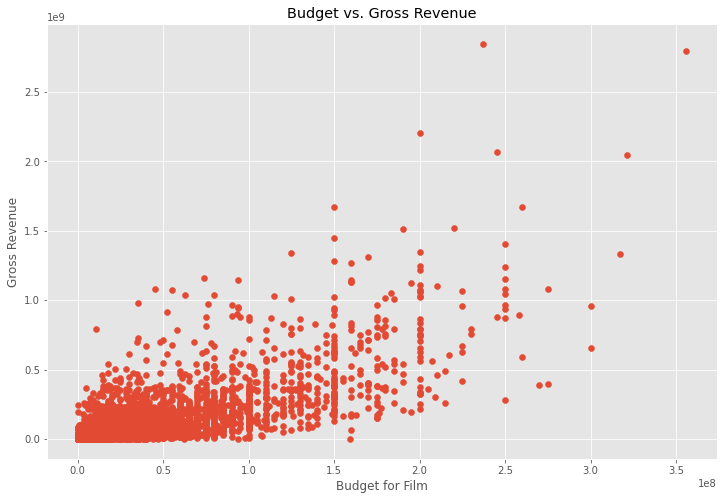

In [38]:
# Create a scatterplot depicting budget vs. gross revenue

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs. Gross Revenue')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Revenue')
plt.show()

[Text(0.5, 1.0, 'Budget vs. Gross Revenue')]

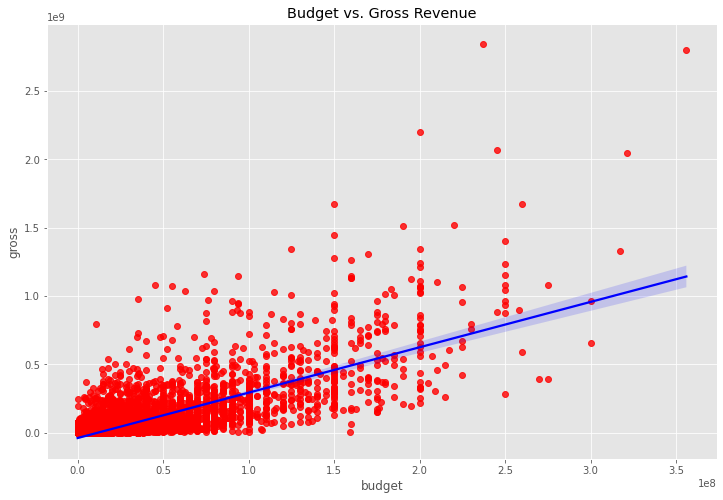

In [39]:
# Use seaborn to better show the relationship between budget and gross revenue

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":'red'}, line_kws={"color":'blue'}).set(title='Budget vs. Gross Revenue')

In [ ]:
# Analysis: Based on the graphs shown above, it appears that budget and gross revenue are positively correlated 
# (i.e., the greater the budget, the greater the gross revenue).

In [40]:
# Find the pairwise correlation of all numerical columns in the dateset

df.corr()

,score,votes,budget,gross,runtime,released year 2
score,1.000000,0.411938,0.064654,0.185084,0.400529,0.109625
votes,0.411938,1.000000,0.421218,0.629325,0.309353,0.222215
budget,0.064654,0.421218,1.000000,0.712561,0.265933,0.262773
gross,0.185084,0.629325,0.712561,1.000000,0.241619,0.247520
runtime,0.400529,0.309353,0.265933,0.241619,1.000000,0.120500
released year 2,0.109625,0.222215,0.262773,0.247520,0.120500,1.000000


In [ ]:
# Analysis: The pairwise correlation table above allows us to confirm that budget and gross revenue are in fact 
# highly correlated - their correlation being the highest among all numerical variables. 

# The high correlation between budget and gross revenue is also shown in the matrix below.

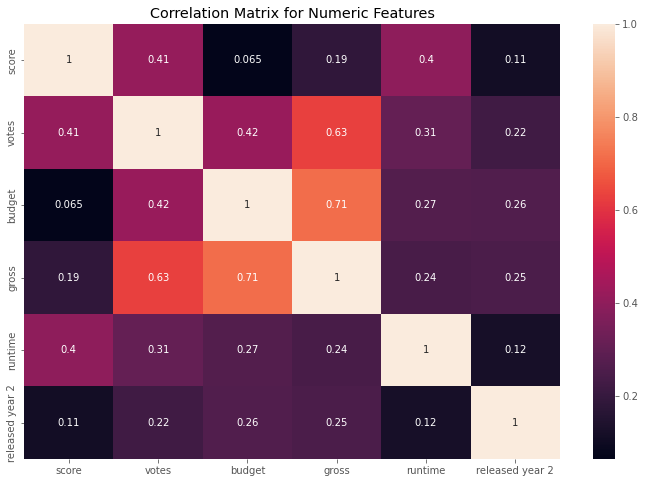

In [41]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.show()

In [ ]:
### Part 3: Explore the impact of the Covid-19 pandemic on gross revenue ###

In [42]:
# Determine the total gross revenue per year for each year in the dataset

df.groupby('released year 2')['gross'].sum().sort_values(ascending=False)

released year 2
2017    29811884925
2019    29462565423
2018    28563413539
2015    27905381351
2016    27777431589
2013    25913946953
2012    25830634486
2014    25165042562
2011    24425159086
2009    24379563496
2010    23303446690
2007    21076885492
2008    21004617129
2003    18669814709
2006    18294643178
2004    18232832219
2005    18058610244
2002    16540924029
2001    15269869580
1999    13989259579
2000    13262754710
1997    13164907330
1998    11096282473
1996    10122667742
1994     9574413488
1995     9486256575
1993     8202645961
1990     7671265855
1992     7250619377
1989     6659779462
1991     6597228601
1988     5602982004
1986     5324594192
1987     5092683272
1985     4660051032
1984     3943246640
1982     3821567549
1983     3800615792
2020     3327459436
1981     3195575135
1980     2800360992
Name: gross, dtype: int64

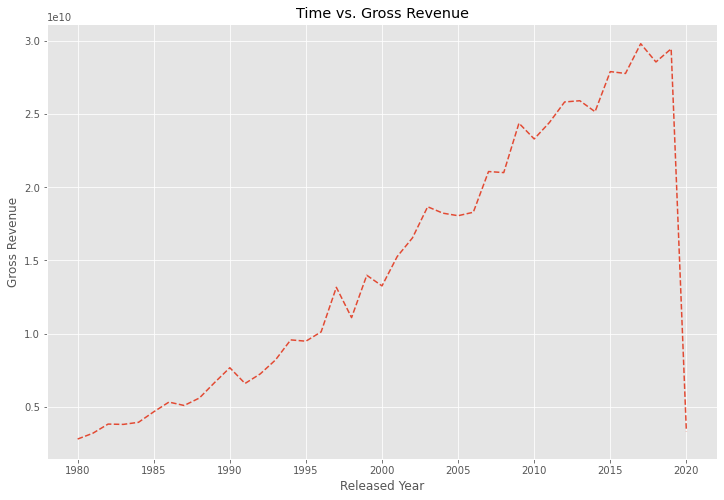

In [43]:
# Create a plot that depicts the trend line for total gross revenue per year for each year in the dataset

plt.plot(df.groupby('released year 2')['gross'].sum(), linestyle='dashed')
plt.title('Time vs. Gross Revenue')
plt.xlabel('Released Year')
plt.ylabel('Gross Revenue')
plt.show()

In [ ]:
# Analysis: The graph shown above indicates that 2020 is an outlier. Prior to 2020, it appears that
# total gross revenue was increasing fairly steadily from one year to the next. The steep decline in total gross
# revenue seen in 2020 is almost certainly a result of the Covid-19 pandemic, which not only prevented people
# from going to movies but prompted many studios to postpone release dates. 

# I expect to see the following hold true after conducting further analysis:

# 1) Fewer movies released in 2020 as compared to 2015, 2016, 2017, 2018, and 2019
# 2) Less money made per movie in 2020 as compared to 2015, 2016, 2017, 2018, and 2019 

In [44]:
# Determine how many movies were released in 2015, 2016, 2017, 2018, 2019, and 2020

df['released year 2'].value_counts().to_frame()

,released year 2
2019,211
2015,211
2011,211
2007,211
1994,205
2008,204
2003,204
1986,204
2018,203
1991,203


In [ ]:
# The chart above shows that there were in fact significantly less movies released in 2020 as compared
# to 2015-2019. In 2020, only 21 movies were released. Meanwhile, from 2015-2019, the number of movies released 
# were as follows:

# - 2019: 211
# - 2018: 203
# - 2017: 202
# - 2016: 197
# - 2015: 211 

In [45]:
# Determine the average gross revenue per movie in 2015, 2016, 2017, 2018, 2019, and 2020

df.groupby('released year 2')['gross'].mean().sort_values(ascending=False).to_frame().apply(lambda x: '%.5f' % x, axis=1)

released year 2
2020    158450449.33333
2017    147583588.73762
2016    141002190.80711
2018    140706470.63547
2019    139633011.48341
2012    134534554.61458
2015    132252992.18483
2013    129569734.76500
2014    128393074.29592
2009    126976893.20833
2010    120743247.09845
2011    115759047.80095
2008    102963809.45588
2007     99890452.56872
2004     95962274.83684
2006     93340016.21429
2003     91518699.55392
2005     90746785.14573
2002     86150645.98438
2001     75969500.39801
1999     71739792.71282
2000     67323627.96954
1997     67167894.54082
1998     55481412.36500
1996     51124584.55556
1995     46730327.95567
1994     46704456.03902
1993     41637796.75635
1990     39747491.47668
1992     39620870.91257
1980     35447607.49367
1989     33978466.64286
1991     32498663.05911
1981     31025001.31068
1982     30329901.18254
1988     28155688.46231
1983     26954721.92908
1987     26250944.70103
1986     26100951.92157
1985     25604676.00000
1984     25277222.05128


In [ ]:
# Contrary to what I expected, the output above indicates that, on average, gross revenue per movie in 2020
# was greater than gross revenue per movie from 2015-2019.

# We can thus conclude that the dramatic drop in gross revenue seen in 2020 is likely due primarily to the 
# decrease in movies released that year because of the Covid-19 pandemic. 

In [ ]:
### Part 4: Determine the relationship between production company and gross revenue ###

In [49]:
df_numerical = df.copy()

In [50]:
# Create a dataset in which the non-numerical values from the original dataset are assigned numbers

for col_name in df_numerical.columns:
    if df_numerical[col_name].dtype == 'object':
        df_numerical[col_name] = df_numerical[col_name].astype('category')
        df_numerical[col_name] = df_numerical[col_name].cat.codes
    
df_numerical

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released year 2
released year,,,,,,,,,,,,,,,
1980,6508,6,6,1685,8.400000,927000,2545,3960,1022,54,19000000,46998772,2274,146,1980
1980,5500,6,1,1472,5.800000,65000,2234,1613,316,55,4500000,58853106,710,104,1980
1980,5075,4,0,1751,8.700000,1200000,1093,2535,1708,55,18000000,538375067,1506,124,1980
1980,282,4,4,1472,7.700000,221000,1279,1976,2198,55,3500000,83453539,1770,88,1980
1980,1016,6,4,1523,7.300000,108000,1037,511,398,55,6000000,39846344,1737,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,6401,6,5,91,5.400000,2400,2476,3828,2386,55,35589876,3661,1861,98,2020
2020,6938,5,4,1865,5.000000,294,2471,3821,2327,55,35589876,413378,1863,120,2020
2020,789,6,6,1091,6.600000,35,1740,1052,515,55,5000,78500541,1710,78,2020


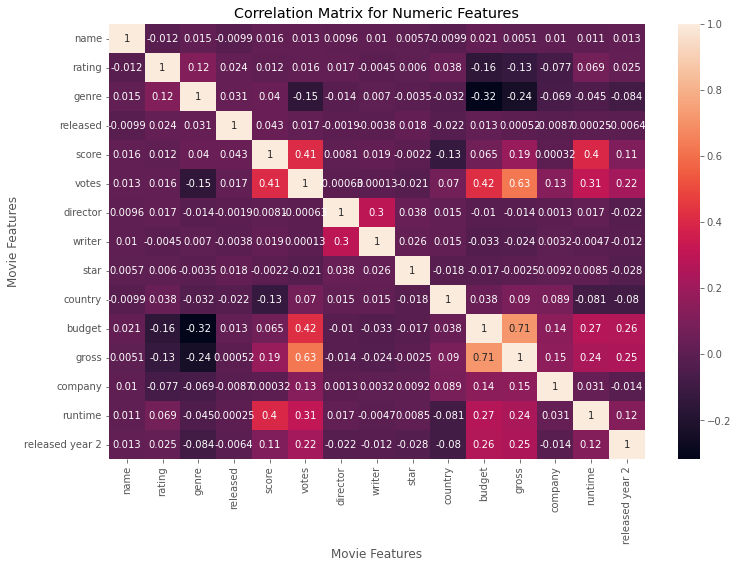

In [51]:
# Visualize the correlation between all variables in the newly created numerical dataset

correlation_matrix = df_numerical.corr()

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [53]:
# Find the pairwise correlation of all columns in the numerical dataset

correlation_matrix = df_numerical.corr()
correlation_matrix

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released year 2
name,1.000000,-0.011944,0.015250,-0.009936,0.016160,0.013174,0.009605,0.010271,0.005666,-0.009942,0.020954,0.005071,0.010085,0.011130,0.012680
rating,-0.011944,1.000000,0.117657,0.024450,0.011562,0.016092,0.017211,-0.004538,0.005972,0.037765,-0.156385,-0.129384,-0.076860,0.069153,0.025343
genre,0.015250,0.117657,1.000000,0.030843,0.040281,-0.148341,-0.013502,0.006956,-0.003450,-0.031503,-0.316818,-0.238240,-0.068755,-0.044528,-0.084491
released,-0.009936,0.024450,0.030843,1.000000,0.043226,0.016870,-0.001867,-0.003831,0.018129,-0.022073,0.013142,0.000520,-0.008693,0.000250,-0.006385
score,0.016160,0.011562,0.040281,0.043226,1.000000,0.411938,0.008074,0.018887,-0.002196,-0.130144,0.064654,0.185084,0.000325,0.400529,0.109625
votes,0.013174,0.016092,-0.148341,0.016870,0.411938,1.000000,-0.000628,0.000133,-0.020975,0.069563,0.421218,0.629325,0.129579,0.309353,0.222215
director,0.009605,0.017211,-0.013502,-0.001867,0.008074,-0.000628,1.000000,0.297418,0.037564,0.015242,-0.010373,-0.014106,0.001328,0.017403,-0.022072
writer,0.010271,-0.004538,0.006956,-0.003831,0.018887,0.000133,0.297418,1.000000,0.026462,0.014936,-0.033407,-0.023732,0.003174,-0.004659,-0.012145
star,0.005666,0.005972,-0.003450,0.018129,-0.002196,-0.020975,0.037564,0.026462,1.000000,-0.017577,-0.017244,-0.002506,0.009243,0.008550,-0.027922
country,-0.009942,0.037765,-0.031503,-0.022073,-0.130144,0.069563,0.015242,0.014936,-0.017577,1.000000,0.038387,0.090446,0.088941,-0.081418,-0.080215


In [54]:
# Unstack the matrix to make it easier to interpret

pd.set_option('display.max_rows', None)
corr_pairs = correlation_matrix.unstack()
corr_pairs

name             name               1.000000
                 rating            -0.011944
                 genre              0.015250
                 released          -0.009936
                 score              0.016160
                 votes              0.013174
                 director           0.009605
                 writer             0.010271
                 star               0.005666
                 country           -0.009942
                 budget             0.020954
                 gross              0.005071
                 company            0.010085
                 runtime            0.011130
                 released year 2    0.012680
rating           name              -0.011944
                 rating             1.000000
                 genre              0.117657
                 released           0.024450
                 score              0.011562
                 votes              0.016092
                 director           0.017211
          

In [55]:
# Sort the correlation pairs from least to most correlated

sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre            budget            -0.316818
budget           genre             -0.316818
genre            gross             -0.238240
gross            genre             -0.238240
rating           budget            -0.156385
budget           rating            -0.156385
genre            votes             -0.148341
votes            genre             -0.148341
score            country           -0.130144
country          score             -0.130144
gross            rating            -0.129384
rating           gross             -0.129384
released year 2  genre             -0.084491
genre            released year 2   -0.084491
country          runtime           -0.081418
runtime          country           -0.081418
released year 2  country           -0.080215
country          released year 2   -0.080215
company          rating            -0.076860
rating           company           -0.076860
genre            company           -0.068755
company          genre             -0.068755
genre     

In [56]:
# Extract the pairs that have the highest correlation

high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross            votes              0.629325
votes            gross              0.629325
budget           gross              0.712561
gross            budget             0.712561
name             name               1.000000
writer           writer             1.000000
company          company            1.000000
gross            gross              1.000000
budget           budget             1.000000
country          country            1.000000
star             star               1.000000
director         director           1.000000
votes            votes              1.000000
score            score              1.000000
released         released           1.000000
genre            genre              1.000000
rating           rating             1.000000
runtime          runtime            1.000000
released year 2  released year 2    1.000000
dtype: float64

In [ ]:
# Analysis: Based on the correlation matrix and tables shown above, we can conclude that a movie's production company 
# isn't highly correlated with its gross revenue.